# **Классификация**

Импортирование и Инсталлирование Библиотек для работ с ними в дальнейшем

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import keras
from keras import layers

Распокоука, Чтение и Ознакомление с Базой Данных

In [7]:
!unzip wine+quality.zip

Archive:  wine+quality.zip
  inflating: winequality-red.csv     
  inflating: winequality-white.csv   
  inflating: winequality.names       


In [8]:
df = pd.read_csv('winequality-white.csv', delimiter=';')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Разделяем Даннные на Иксы и Игрики, а затем на Тестовые и Тренировочные

In [12]:
X = df[df.columns[:-1]]
y = df['quality']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Стандартизируем Данные

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(x_train)

StandardScaler()

In [16]:
scaler.transform(x_train).shape

(3918, 11)

Создаем Нейросеть

In [17]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(11, activation='softmax'),
])

Компилируем Нейросеть

In [18]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Запускаем Нейросеть

In [19]:
data = model.fit(
    scaler.transform(x_train), y_train,
    epochs=100,
    validation_split=0.15
)

Epoch 1/100
105/105 [==============================] - 2s 5ms/step - loss: 1.4815 - accuracy: 0.4309 - val_loss: 1.2530 - val_accuracy: 0.4847
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 1.2063 - accuracy: 0.4961 - val_loss: 1.1738 - val_accuracy: 0.5051
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 1.1421 - accuracy: 0.5141 - val_loss: 1.1241 - val_accuracy: 0.5544
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 1.1126 - accuracy: 0.5300 - val_loss: 1.1152 - val_accuracy: 0.5442
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 1.0911 - accuracy: 0.5438 - val_loss: 1.0931 - val_accuracy: 0.5340
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 1.0913 - accuracy: 0.5351 - val_loss: 1.1016 - val_accuracy: 0.5425
Epoch 7/100
105/105 [==============================] - 0s 4ms/step - loss: 1.0654 - accuracy: 0.5405 - val_loss: 1.0953 - val_accuracy: 0.5374

Создаем График по Которому Предсказываем - Сколко Эпох Следует Использовать

In [20]:
history = data.history
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

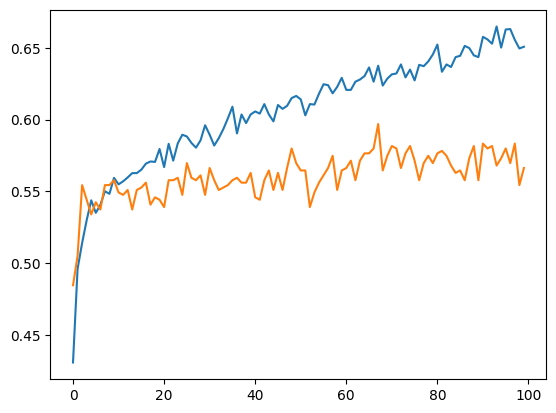

In [21]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.show()

In [22]:
data = model.fit(
    scaler.transform(x_train), y_train,
    epochs=45,
    validation_split=0.15
)

Epoch 1/45
105/105 [==============================] - 0s 3ms/step - loss: 0.7975 - accuracy: 0.6580 - val_loss: 1.0634 - val_accuracy: 0.5646
Epoch 2/45
105/105 [==============================] - 0s 3ms/step - loss: 0.8044 - accuracy: 0.6574 - val_loss: 1.0296 - val_accuracy: 0.5816
Epoch 3/45
105/105 [==============================] - 0s 4ms/step - loss: 0.7911 - accuracy: 0.6607 - val_loss: 1.0613 - val_accuracy: 0.5663
Epoch 4/45
105/105 [==============================] - 0s 4ms/step - loss: 0.8000 - accuracy: 0.6565 - val_loss: 1.0484 - val_accuracy: 0.5765
Epoch 5/45
105/105 [==============================] - 0s 4ms/step - loss: 0.7988 - accuracy: 0.6715 - val_loss: 1.0541 - val_accuracy: 0.5748
Epoch 6/45
105/105 [==============================] - 0s 4ms/step - loss: 0.7908 - accuracy: 0.6661 - val_loss: 1.0557 - val_accuracy: 0.5680
Epoch 7/45
105/105 [==============================] - 0s 4ms/step - loss: 0.7905 - accuracy: 0.6670 - val_loss: 1.0490 - val_accuracy: 0.5731
Epoch 

In [23]:
y_predicted = model.predict(scaler.transform(x_test))

31/31 [==============================] - 0s 1ms/step


In [24]:
y_predicted = y_predicted.argmax(axis=1)

In [25]:
accuracy_score(y_test, y_predicted)

0.5948979591836735

In [26]:
confusion_matrix(y_test, y_predicted)

array([[  1,   1,   1,   0,   0,   0],
       [  0,   3,  22,   9,   0,   0],
       [  0,   3, 188,  74,   4,   0],
       [  0,   1,  96, 283,  59,   2],
       [  0,   0,   4,  79, 101,   2],
       [  0,   1,   3,  12,  24,   7]])

# **Регрессия**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
import keras
from keras import layers

Распокоука, Чтение и Ознакомление с Базой Данных

In [5]:
!unzip house-prices-advanced-regression-techniques -d house-prices-advanced-regression-techniques

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: house-prices-advanced-regression-techniques/data_description.txt  
  inflating: house-prices-advanced-regression-techniques/sample_submission.csv  
  inflating: house-prices-advanced-regression-techniques/test.csv  
  inflating: house-prices-advanced-regression-techniques/train.csv  


In [6]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', index_col='Id')

In [7]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Создаем Переменную с Помощи Коррелиации, и Создаем Таблицу по Коррелиации

In [10]:
corr = df.corr(numeric_only=True)

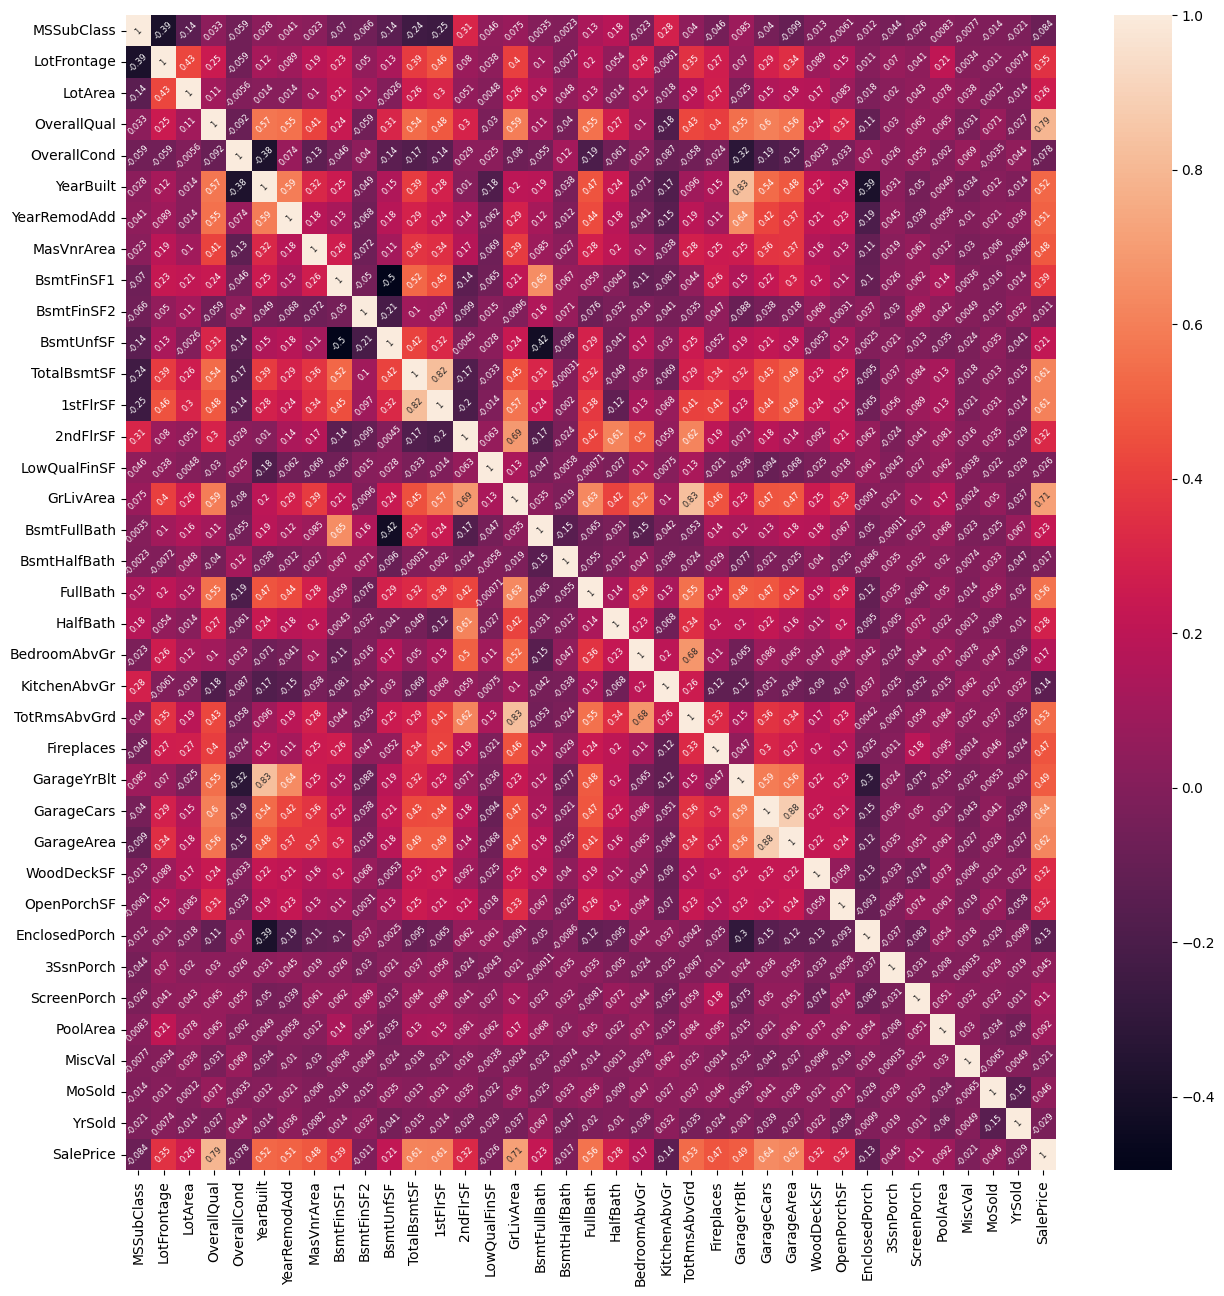

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    corr,
    annot=True,
    annot_kws={
        'size': 6,
        'rotation': 45
    }
)
plt.show()

Удаляем Сильно Коррелирующие колонки, кромеколонки Saleprice

In [12]:
to_remove = []

for i in corr.columns:
  for j in corr.columns:
    if i == j:
      continue
    if (
        not i in to_remove
        and not j in to_remove
        and (corr.loc[i, j] >= 0.75
             or corr.loc[i, j] <= -0.75
            )
        ):
        to_remove.append(j)

to_remove = to_remove[1:]
df.drop(columns=to_remove, inplace=True)

Создаем Пайплайн для стандартизации и кодировки категориальных данных в числовые

In [13]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaling', StandardScaler(with_mean=False))
])

tranformer = ColumnTransformer([
    ('cat', cat_transformer, df.select_dtypes(include='object').columns),
    ('num', num_transformer, df.select_dtypes(include=np.number).columns[:-1]),
])

pipeline = Pipeline([
    ('transform', tranformer),
])

Разделяем Даннные на Иксы и Игрики, а затем на Тестовые и Тренировочные

In [14]:
X = df[df.columns[:-1]]
y = df['SalePrice']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Фитим и Трансформируем Пайплайн

In [16]:
pipeline.fit(X)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle',...
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))]))])

In [17]:
pipeline.transform(x_train).shape

(1168, 283)

Создаем Конструкцию Для Нейросети, Данная Конструкция была Самой Успешной

In [18]:
model = keras.Sequential([
    layers.Dense(1024, input_shape=(283,), activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1024, activation='relu'),
    layers.Dense(1),
])

Компилируем Нейросеть

In [19]:
model.compile(
    loss='mse',
    optimizer='adam',
)

Запускаем Нейросеть

In [20]:
model.fit(pipeline.transform(X).toarray(), y, epochs=100)

Epoch 1/100
46/46 [==============================] - 6s 7ms/step - loss: 12187890688.0000
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 7013145600.0000
Epoch 3/100
46/46 [==============================] - 0s 6ms/step - loss: 7112796160.0000
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 6671316992.0000
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 5169993216.0000
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 3242668800.0000
Epoch 7/100
46/46 [==============================] - 0s 6ms/step - loss: 2876022016.0000
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 2116690944.0000
Epoch 9/100
46/46 [==============================] - 0s 5ms/step - loss: 1817916928.0000
Epoch 10/100
46/46 [==============================] - 0s 6ms/step - loss: 1773171328.0000
Epoch 11/100
46/46 [==============================] - 0s 6ms/step - loss: 2550523136.0000
Epoch 12/100
46/46

Вот Мы и Получили Среднюю Ошибку

In [22]:
y_train.mean()

180068.37842465754